# **Creating a couple of problem statements**

## **Ford GoBike Data (formerly Bay Area Bike Share Data)**

Each trip is anonymized and includes:

* Trip Duration (seconds)
* Start Time and Date
* End Time and Date
* Start Station ID
* Start Station Name
* Start Station Latitude
* Start Station Longitude
* End Station ID
* End Station Name
* End Station Latitude
* End Station Longitude
* Bike ID
* User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

In [1]:
from google.colab import files
uploaded = files.upload()

Saving 2017-fordgobike-tripdata.csv to 2017-fordgobike-tripdata.csv


In [0]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('2017-fordgobike-tripdata.csv')
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


# **Assumption made Before touching data.**

* By using **Start Station Name** col we can get : 
  * From where the large no. bikes get rented, using this info. 
    * we can raise the charges upto very small amount and can get some profit.

* By using **Start Station Name** col and **End Station Name** we can get : 
  * The **most preffered roots** of our members, using this info. 
      * we start cab services on that root.
      * if the large no. of members use bike on same time that we can get from Start Time and Date col.

  * The **least preffered roots** of our members, using this info. 
      * we can lonch special offers on that roots.
      * Advertisment Holdings on those roots (Because the this might be possible that most general public that travelles from that root might not know about our services.)
      * Can arrange cycling events 

* By using **duration_sec** col we can get :
  * The **mode duration_sec** as the electric bikes are charged on the time basis, we will set a time bar just little above the mode time and give offers or promocodes.
  * By looking at the first 5 records of data i.e. duration_sec is nearly or above 50000 sec which is 13 hours approx, which we can think them as tracking or picnic trips and can **start car rental** for comfortable journy. 


<hr>

# **Analysing Data**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


* converting date columns to date time.

In [0]:
data['start_time'] = pd.to_datetime(data['start_time'])

In [0]:
data['end_time'] = pd.to_datetime(data['end_time'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

### **Sorting the Data on Date col so we can get the time range of data.**

In [9]:
data.sort_values(by='start_time',ascending=True)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
519697,424,2017-06-28 09:47:36.347,2017-06-28 09:54:41.187,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,48,2nd St at S Park St,37.782411,-122.392706,240,Subscriber
519698,366,2017-06-28 09:47:41.664,2017-06-28 09:53:47.715,58,Market St at 10th St,37.776619,-122.417385,59,S Van Ness Ave at Market St,37.774814,-122.418954,669,Subscriber
519699,188,2017-06-28 09:49:46.377,2017-06-28 09:52:55.338,25,Howard St at 2nd St,37.787522,-122.397405,48,2nd St at S Park St,37.782411,-122.392706,117,Subscriber
519692,1201,2017-06-28 09:50:59.175,2017-06-28 10:11:00.359,81,Berry St at 4th St,37.775880,-122.393170,9,Broadway at Battery St,37.798572,-122.400869,77,Subscriber
519696,431,2017-06-28 09:56:39.631,2017-06-28 10:03:51.090,66,3rd St at Townsend St,37.778742,-122.392741,321,5th at Folsom,37.780146,-122.403071,316,Subscriber
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,1544,2017-12-31 23:53:38.943,2018-01-01 00:19:23.047,14,Clay St at Battery St,37.795001,-122.399970,27,Beale St at Harrison St,37.788059,-122.391865,558,Subscriber
22,422,2017-12-31 23:54:25.337,2018-01-01 00:01:27.354,139,Garfield Square (25th St at Harrison St),37.751017,-122.411901,99,Folsom St at 15th St,37.767037,-122.415443,2415,Subscriber
16,1474,2017-12-31 23:54:40.146,2018-01-01 00:19:14.351,14,Clay St at Battery St,37.795001,-122.399970,27,Beale St at Harrison St,37.788059,-122.391865,3646,Subscriber
17,1397,2017-12-31 23:55:09.686,2018-01-01 00:18:26.721,78,Folsom St at 9th St,37.773717,-122.411647,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,1667,Customer


In [20]:
519700 / 183

2839.8907103825136

* Conclusion 
  * Data is of 6 months for end of June 2017 to the end of Dec 2017.(approx ~ 183 days)
  * Dividing the no. of records with the no. of days we get 519700 / 183 = (approx~) 2840 rides per day, which is shows business is working good.


In [65]:
data[data.start_time.dt.date == pd.to_datetime('2017-06-30')].bike_id.count()

1038

In [69]:
data[data.start_time.dt.date == pd.to_datetime('2017-07-20')].bike_id.count()

1938

<hr>

In [10]:
data.user_type.value_counts()

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64

* from above we can see that 20% of users are not subscribers. and making them as target.

In [0]:
Customer_data = data[data.user_type == 'Customer']

In [83]:
Customer_data.start_station_name.value_counts()[:5]

The Embarcadero at Sansome St                         5864
San Francisco Ferry Building (Harry Bridges Plaza)    5210
Powell St BART Station (Market St at 4th St)          3174
Union Square (Powell St at Post St)                   2133
The Embarcadero at Vallejo St                         2098
Name: start_station_name, dtype: int64

In [0]:
top_5Customer_stations = Customer_data.start_station_name.value_counts()[:5].index

In [0]:
Subscriber_data = data[data.user_type == 'Subscriber']

In [46]:
for station in top_5Customer_stations:
  print(Subscriber_data[Subscriber_data.start_station_name == station].start_station_name.value_counts())

The Embarcadero at Sansome St    7800
Name: start_station_name, dtype: int64
San Francisco Ferry Building (Harry Bridges Plaza)    9977
Name: start_station_name, dtype: int64
Powell St BART Station (Market St at 4th St)    6968
Name: start_station_name, dtype: int64
Union Square (Powell St at Post St)    3476
Name: start_station_name, dtype: int64
The Embarcadero at Vallejo St    2171
Name: start_station_name, dtype: int64


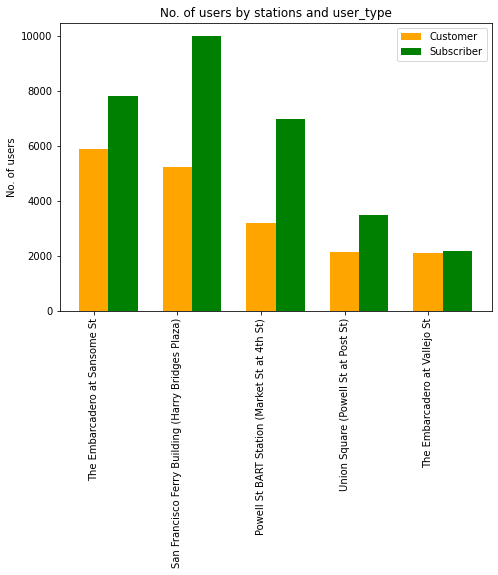

In [109]:
N = 5
counts = [[5864, 5210, 3174, 2133, 2098],
[7800, 9977, 6968, 3476, 2171]]
ind = np.arange(N) 
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, counts[0], width, color='orange')
ax.bar(ind + width , counts[1], width, color='g')
ax.set_ylabel('No. of users')
ax.set_title('No. of users by stations and user_type')
ax.legend(labels=['Customer', 'Subscriber'])
plt.xticks(ind, top_5Customer_stations , rotation =90 )
plt.show()

* Solution :
  * In these 5 locations we can arrange events for Subscribers Only, eventually what happen is that some customes become subscribers.
  * Other reason to choose these 5 stations because there is not much difference in count of users that are subscriber and customers.


<hr>

In [12]:
data.duration_sec.describe()

count    519700.000000
mean       1099.009521
std        3444.146451
min          61.000000
25%         382.000000
50%         596.000000
75%         938.000000
max       86369.000000
Name: duration_sec, dtype: float64

* from above we get that 75% of rides lasts nearly 15 mins.
* this is something that at start we don't know.

In [0]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Duration')

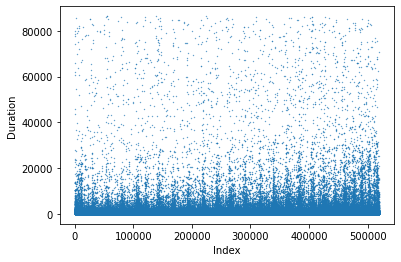

In [76]:
plt.scatter( data.index,data.duration_sec , s=0.1)
plt.xlabel('Index')
plt.ylabel('Duration')

In [81]:
# trips that take duration more that 25 mins
data[data.duration_sec >= 1500].bike_id.count()

52179

* Conclusion:
  * Outof 519700 tips only 52179 trips take more that 25 mins,i.e only 10% of trips.

## **In this notebook we only searched for possible problem statements that can be generated from the data to increase business.**